In [ ]:
#installation
!pip install library_name

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/Height-Weight Data.csv")

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0.5, 1.0, 'Height-Weight Data')

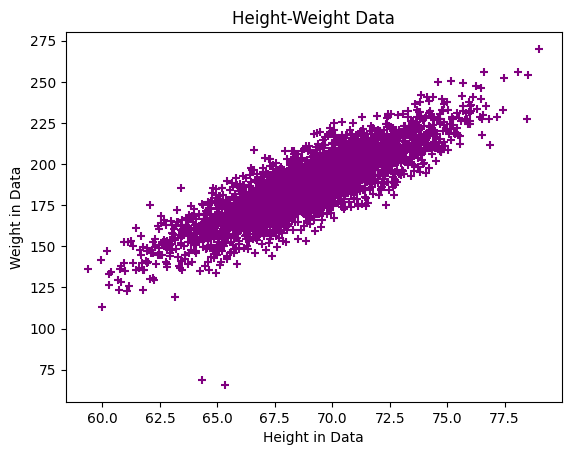

In [5]:
plt.scatter(df[['Height']] , df[['Weight']],color='purple', marker='+') 
plt.ylabel('Weight in Data')
plt.xlabel('Height in Data')
plt.title('Height-Weight Data')

In [6]:
df.Height.mean()

69.02441087268781

In [7]:
df.Weight.mean()

186.891257979463

In [8]:
x = df[['Height']] 
y = df[['Weight']]

In [9]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state=1)

In [10]:
xtrain.head()

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [11]:
ytrain.head()

,Weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [12]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [13]:
ytest.head()

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


*****Linear Regression***** 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [27]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [28]:
reg.predict([[62.5]])

array([[147.93854015]])

In [29]:
m = reg.coef_

In [30]:
c = reg.intercept_

In [31]:
c

array([-223.73384719])

In [32]:
m

array([[5.9467582]])

In [33]:
predicted = (m*62.5) + c
predicted

array([[147.93854015]])

In [34]:
reg.predict([[62.5]])

array([[147.93854015]])

In [35]:
reg.predict(xtest)

array([[177.09443165],
       [189.92284867],
       [167.62178605],
       ...,
       [179.20146692],
       [198.1912708 ],
       [190.70609708]])

In [36]:
df2 = df.copy()

In [37]:
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [38]:
df2['predicted'] = reg.predict(df[['Height']])

In [39]:
df2.head()

,Height,Weight,predicted
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


****Best fit Line****

Text(0.5, 1.0, 'Height-Weight Data')

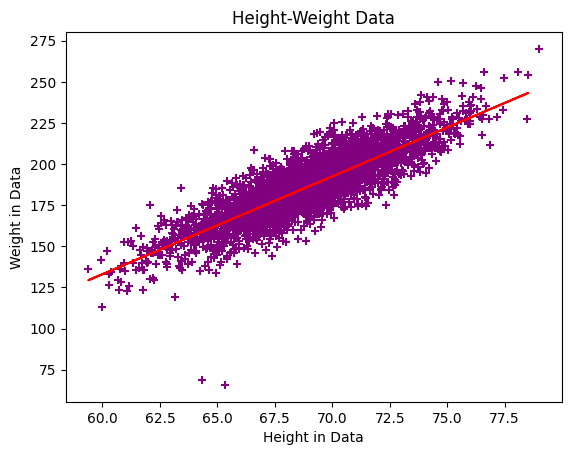

In [40]:
plt.scatter(df[['Height']] , df[['Weight']],color='purple', marker='+') 
plt.plot(xtest, reg.predict(xtest), color='red') # reg.predict(xtest) = m*xtest + c
plt.ylabel('Weight in Data')
plt.xlabel('Height in Data')
plt.title('Height-Weight Data')

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
#testing MSE
test_mse = mean_squared_error(ytest, reg.predict(xtest)) #ytest is actual y, reg.predict(xtest) is actually predicted y
test_mse

111.14654406073984

In [43]:
#testing MAE
test_mse = mean_absolute_error(ytest, reg.predict(xtest))
test_mse

8.29430074943638

In [44]:
#training MSE
train_mse = mean_squared_error(ytrain, reg.predict(xtrain))
train_mse

103.4875929238486

In [45]:
#training MAE
train_mse = mean_absolute_error(ytrain, reg.predict(xtrain))
train_mse

7.95548845242242

In [46]:
reg.score(xtest, ytest) # Testing accuracy

0.7332431736613305

In [47]:
reg.score(xtrain, ytrain) # Training accuracy

0.7317716240073282